# PyVista


## Setup

```shellsession
# In `env` directory
$ python -m venv pyvista/venv
$ source pyvista/venv/bin/activate
$ pip install -r pyvista/requirements.txt
```

To use iPython kernrl, run following:

```shellsession
$ ipython kernel install --user --name=pyvista --display-name=pyvista
```

## Example data

Download the following files and put then im `data`. Unzip the zip file.

- [airplane_001_mesh.zip](https://drive.google.com/file/d/19GGxmtkqdS2yNnM0IL70u0UZYRadXG2C/view?usp=sharing)
- [airplane_001_pointcloud.npy](https://drive.google.com/file/d/1TIx83sQ-OwXjYtUujVP1vsiEPUh_blKI/view?usp=sharing)

/home/kujaku/libraries/python/anaconda3-2020.11/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


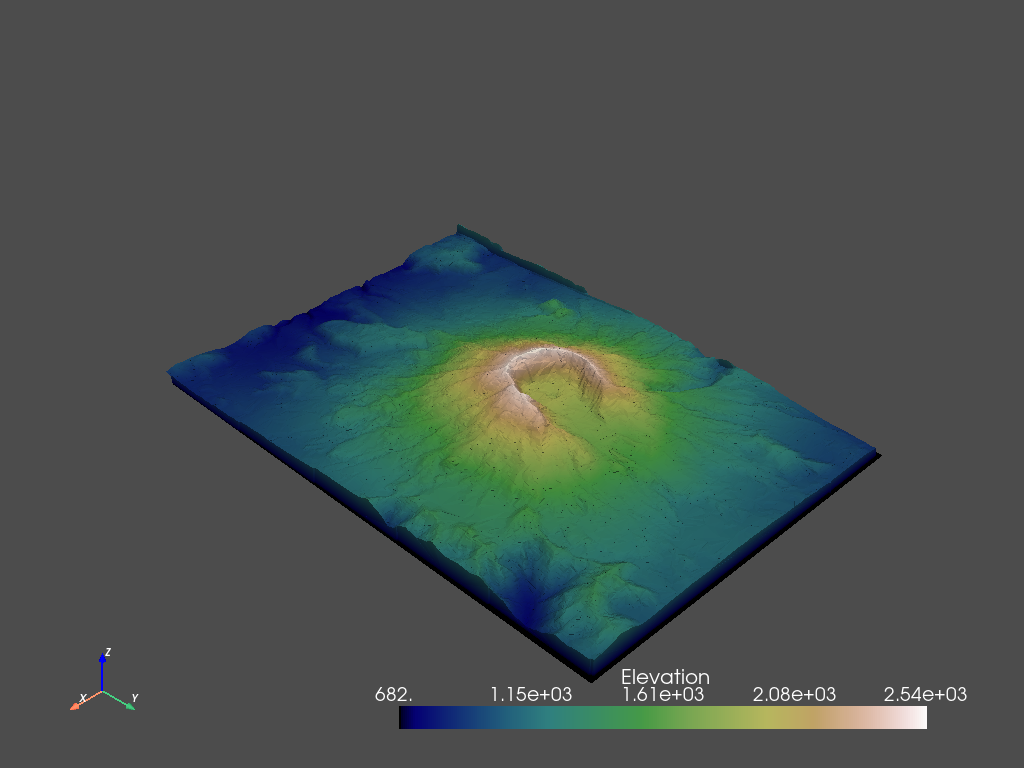

In [1]:
# Installation check

import pyvista
from pyvista import examples


pyvista.start_xvfb()

mesh = examples.download_st_helens()
warped = mesh.warp_by_scalar('Elevation')
surf = warped.extract_surface().triangulate()
surf = surf.decimate_pro(0.75)  # reduce the density of the mesh by 75%
surf.plot(cmap='gist_earth')

## Mesh

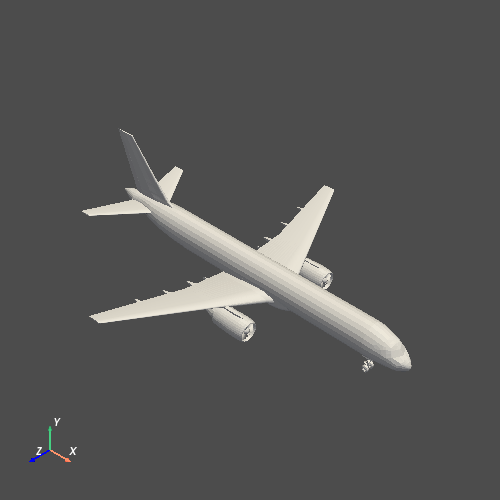

In [2]:
import pyvista as pv


# Load mesh from an obj file
reader = pv.get_reader("data/airplane_001_mesh/model.obj")  # X-forward, Y-up
mesh = reader.read()

# Camera setting
cpos = [(1, 1, 1), (0, 0, 0), (0, 1, 0)]  # [camera position, focal position, upward axis]

# Display the mesh
mesh.plot(window_size=(500, 500), cpos=cpos, jupyter_backend="static")


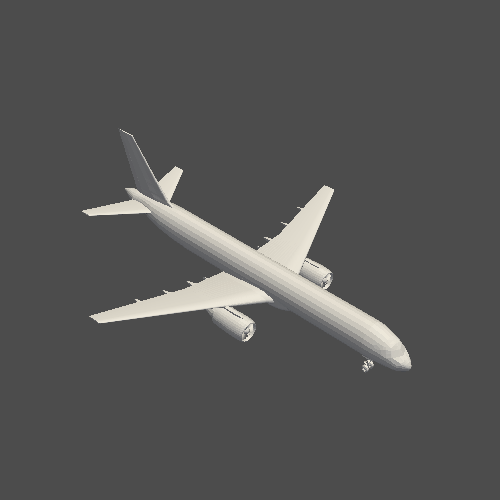

In [3]:
# Use Plotter and export image array
pl = pv.Plotter()
pl.add_mesh(mesh)

_, img_a = pl.show(window_size=(500, 500), cpos=cpos, jupyter_backend="none", screenshot=True, return_cpos=True, return_img=True)


from PIL import Image


img = Image.fromarray(img_a)
img

## Point cloud

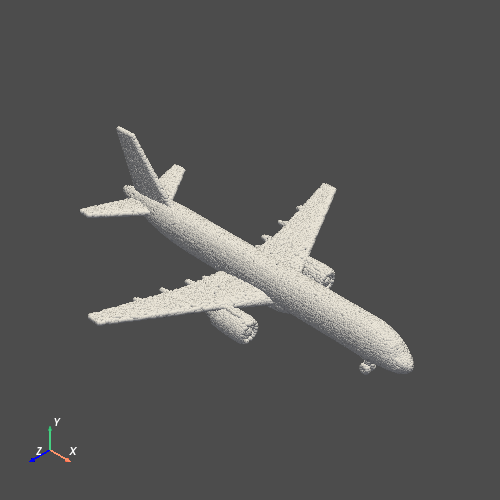

In [4]:
import pyvista as pv
import numpy as np


# Load point cloud data as numpy array
pc_data = np.load("data/airplane_001_pointcloud.npy")  # (N, 3) array
#print(pc_data.shape)

# Convert the numpy array to PolyData
pc = pv.PolyData(pc_data)

# Camera setting
cpos = [(1, 1, 1), (0, 0, 0), (0, 1, 0)]  # [camera position, focal position, upward axis]

# Display the image
pc.plot(window_size=(500, 500), cpos=cpos, jupyter_backend="static", render_points_as_spheres=True)
        

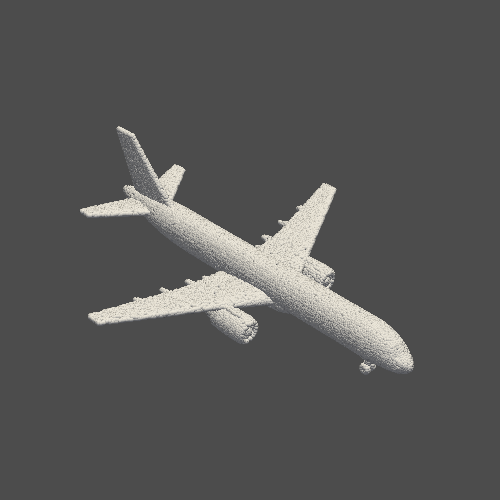

In [5]:
# Use Plotter and export image array
pl = pv.Plotter()
pl.add_points(pc, render_points_as_spheres=True)

_, img_a = pl.show(window_size=(500, 500), cpos=cpos, jupyter_backend="none", screenshot=True, return_cpos=True, return_img=True)


from PIL import Image


img = Image.fromarray(img_a)
img